Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [ ]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğu ekrana yazdırılacaktır.

In [5]:
print(df.groupby('kategori').size())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Genelge                         385
Kanun                           514
Kanun Hükmünde Kararname         91
Komisyon Raporu                 500
Resmi Gazete                    546
Tebliğ                          623
Tüzük                            82
Yönetmelik                      597
Özelge                          750
dtype: int64


Veriler üzerinde yaptığımız ön çalışmada (ekrana data_text sütunundan / alanından bir kaç satır yazdırılmış ve içerikleri incelenmiştir) veri kümesinin data_text sütunundaki / alanındaki içerik iki parçaya ayrılabileceği görülmüştür. Böylelikle data_text sütunu / alanı işlenirken belgeye ait bilgiler birinci parçada belgenin içeriği ikinci parçada görülebilir. Tüm data_text kayıtlarında yer alan ortak bir noktanın varlığını kontrol etmek için aşağıdaki kod yardımı ile resmi belgelerin hepsinde 'Madde 1 -' verisi var mı?

In [ ]:
kayitSayisi, alanSayisi = df.shape
say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if df['data_text'][satir].find('Madde 1 -'):
    say+=1
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "Madde 1 -" verisini içeren kayıt sayısı birbirine eşittir.')
else:
  print('Tüm kayıtlarda aranan veri bulunamamıştır.')

Yukarıdaki bulgular doğrultusunda örnek bir kaydı ikiye bölerek **belge ile ilgili verileri toplayabileceğimiz baş kısmı** görelim. Yine bu baş kısmın **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım.

In [59]:
satir = 1802
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir][:df['data_text'][satir].find('Madde 1')],sep='')

Kategori:Cumhurbaşkanlığı Kararnamesi
-----------------------------------
İçerik:Resmî Gazete Tarihi: 10.07.2018 Resmî Gazete Sayısı: 30474
CUMHURBAŞKANLIĞI TEŞKİLATI HAKKINDA CUMHURBAŞKANLIĞI KARARNAMESİ (Kararname Numarası: 1)

BİRİNCİ KISIM
CUMHURBAŞKANLIĞI MAKAMI
Cumhurbaşkanı



Cumhurbaşkanlığı Kararnamesi olarak kategori edilen toplam 54 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 54 kayıttan kaçında doğru sonuç verdiğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [60]:
# Cumhurbaşkanlığı Kararnamesiiçin kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulCK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında Mevzuat No'yu oluşturan parçalardan biri olan "CUMHURBAŞKANLIĞI KARARNAMESİ" ifadesi varsa o bir Cumhurbaşkanlığı Kararnamesidir önermesini kontrol ediyoruz!
  if verilenMetin.find('CUMHURBAŞKANLIĞI KARARNAMESİ')!=-1:
    return 'Cumhurbaşkanlığı Kararnamesi'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 54 kayıt arasında kaç tanesinin Cumhurbaşkanlığı Kararnamesi olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Cumhurbaşkanlığı Kararnamesi kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Cumhurbaşkanlığı Kararnamesi':
    continue
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  if kategoriBulCK(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1

print(hataSayisi)

0


Cumhurbaşkanlığı Kararnamesi kategorisinde bulduğumuz yöntemin 0 hata ile çalıştığını gördük. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Cumhurbaşkanlığı Kararnamesi kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [ ]:
# Cumhurbaşkanlığı Kararnamesi için kategori bulmak amacıyla kullanılan fonksiyonumuz
def kategoriBulCK(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  # data_text alanındaki kayıdın ilk parçasında "CUMHURBAŞKANLIĞI KARARNAMESİ" ifadesi varsa o bir Cumhurbaşkanlığı Kararnamesi'dir önermesini kontrol ediyoruz!
  if verilenMetin.find('CUMHURBAŞKANLIĞI KARARNAMESİ')!=-1:
    return 'Cumhurbaşkanlığı Kararnamesi'
  else:
    return 'Cumhurbaşkanlığı Kararnamesi Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

# Sadece Cumhurbaşkanlığı Kararnamesi kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  fonksiyonumuzunCiktisi = kategoriBulCK(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Cumhurbaşkanlığı Kararnamesi' and df['kategori'][satir]=='Cumhurbaşkanlığı Kararnamesi':
    # Fonksiyonumuz Cumhurbaşkanlığı Kararnamesi olan kategoriyi Cumhurbaşkanlığı Kararnamesi olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Cumhurbaşkanlığı Kararnamesi Değil' and df['kategori'][satir]=='Cumhurbaşkanlığı Kararnamesi':
    # Fonksiyonumuz Cumhurbaşkanlığı Kararnamesi olan kategoriyi Cumhurbaşkanlığı Kararnamesi olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Cumhurbaşkanlığı Kararnamesi' and df['kategori'][satir]!='Cumhurbaşkanlığı Kararnamesi':
    # Fonksiyonumuz Cumhurbaşkanlığı Kararnamesi olmayan kategoriyi Cumhurbaşkanlığı Kararnamesi olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Cumhurbaşkanlığı Kararnamesi olmayan kategoriyi Cumhurbaşkanlığı Kararnamesi olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Accuracy:',(TP + TN) / satirToplami)
print('Precision:',TP / (TP+FP) )
print('Sensitivity (Recall):',TP / (TP+FN) )
print('Specificity:',TN / (TN+FP) )
print('F-score (F1 Skore):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

Bulunan TP, TN, FP ve FN değerlerine göre Karmaşıklık Matrisi görselleştirilecektir.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

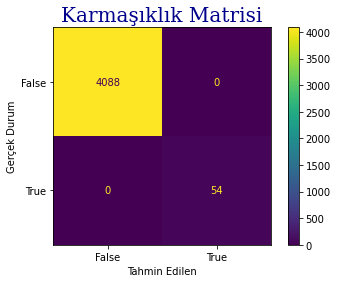

In [63]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline


karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulCK** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.,

- 54 Cumhurbaşkanlığı Kararnamesi belgesinin hepsini Cumhurbaşkanlığı Kararnamesi belgesi olarak tespit etmiştir.
- 4088 Cumhurbaşkanlığı Kararnamesi belgesi olmayan belgeyi de Cumhurbaşkanlığı Kararnamesi belgesi olmayan belge olarak tespit etmiştir.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
  - **Doğruluk (Accuracy):** 1.0
  - **Keskinlik (Precision):** 1.0
  - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 1.0
  - **Özgüllük (Specificity):** 1.0
  - **F1-Puanı (F1 Score):** 1.0


